# EDA-6 

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 导入数据

In [145]:
all_reviews = pd.read_csv("../../Data Preparation/原始数据/cleaned_senti_reviews.csv",index_col=0)

In [146]:
all_reviews.head(2)

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,polarity_score,sentiment
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,...,10.0,10.0,10.0,8.0,8.0,f,2,0.02,0.9615,pos
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,...,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9484,pos


In [147]:
all_reviews.columns

Index(['reviewer_id', 'listing_id', 'date', 'reviewer_name', 'comments',
       'name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores

### 日期分割年月日

先将date特征转为datetime类型，然后分割年月日

In [148]:
all_reviews['date'] = pd.to_datetime(all_reviews['date'])

In [149]:
all_reviews['year'] = all_reviews['date'].dt.year
all_reviews['month'] = all_reviews['date'].dt.month
all_reviews['day'] = all_reviews['date'].dt.day

In [150]:
all_reviews["year_month"] = pd.to_datetime(all_reviews["year"].astype(str)+"-"+all_reviews["month"].astype(str)).dt.to_period('M')

In [151]:
all_reviews.head(2)

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,...,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,polarity_score,sentiment,year,month,day,year_month
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,...,8.0,f,2,0.02,0.9615,pos,2013,10,21,2013-10
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,...,9.0,f,1,0.30,0.9484,pos,2014,4,18,2014-04


### 提取所需特征，缩小维度 

In [152]:
feature_selected=['reviewer_id', 'listing_id','year', 'month', 'day','comments',"year_month"]

In [153]:
all_reviews=all_reviews[feature_selected]

In [154]:
all_reviews.head(2)

,reviewer_id,listing_id,year,month,day,comments,year_month
0,8557223,49091,2013,10,21,Fran was absolutely gracious and welcoming. Ma...,2013-10
1,1356099,50646,2014,4,18,A comfortable room in a smart condo developmen...,2014-04


### 删除特殊年份的数据 

我们要把2021年1月份的数据删除。否则1月会比其他月份更有优势，评论数量天然多于其他的月份。

同理也要删除2012年全部的数据，因为最早的数据是从2011年5月开始的。2011年5-12月的数据都要删除。 

In [155]:
all_reviews.year_month.value_counts().sort_index().index

PeriodIndex(['2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
             '2011-11', '2011-12', '2012-01', '2012-02',
             ...
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01'],
            dtype='period[M]', length=117, freq='M')

In [156]:
all_reviews=all_reviews[(all_reviews.year!=2021) & (all_reviews.year!=2011)]

In [157]:
all_reviews.year_month.value_counts().sort_index().index

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10',
             ...
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', length=108, freq='M')

## 分析数据

### 任务1：展示2012-2020每个月的总评论数量

计算出每一个月份对应的reviews总数量，然后利用柱状图和折线图展示出来。

In [158]:
number_of_reviews_per_month=all_reviews.month.value_counts().sort_index()

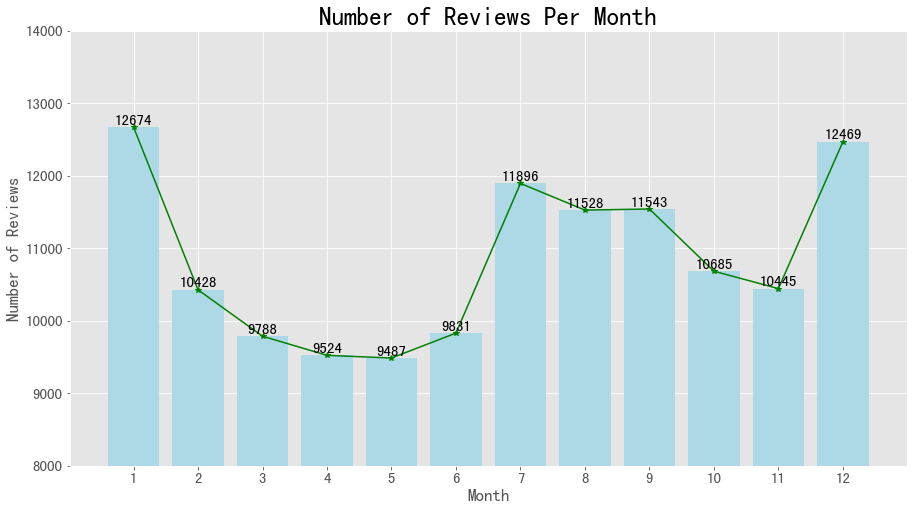

In [159]:
plt.style.use("ggplot")

x = number_of_reviews_per_month.index
y = number_of_reviews_per_month.values

plt.figure(figsize=(15,8))

plt.plot(x,y,
         color="green", marker="*",
         linestyle="-"
        )

plt.bar(x,y, 
        color="lightblue",
       )

plt.title("Number of Reviews Per Month",fontsize=25)
plt.xlabel('Month', fontsize=17)
plt.ylabel('Number of Reviews', fontsize=17)

plt.xticks(range(1,13))
plt.tick_params(labelsize=15)
plt.ylim(ymin = 8000, ymax = 14000)

for a,b in zip(x,y):
    
    plt.text(a,b+10,b,   
             va='bottom', 
             ha='center',
             fontsize=15  
            )
    
    
plt.show()

可以看出，7-9月以及12-1月都是旅游的旺季，这段时间的住房需求量相较其他月份会大很多。

### 任务2：分析2013-2020年每年评论的数量的变化

观察评论每年的增速，用来表示爱彼迎的火爆程度逐年递增，观察哪一年猛增

In [167]:
all_reviews.head(2)

,reviewer_id,listing_id,year,month,day,comments,year_month
0,8557223,49091,2013,10,21,Fran was absolutely gracious and welcoming. Ma...,2013-10
1,1356099,50646,2014,4,18,A comfortable room in a smart condo developmen...,2014-04


先按照year聚合然后计数

In [173]:
data=all_reviews.groupby(by="year").agg({'reviewer_id':'count'})

In [176]:
data

,reviewer_id
year,
2012,191
2013,532
2014,1593
2015,6241
2016,13432
2017,24040
2018,36008
2019,37401
2020,10860


In [179]:
x=data.index
y=data.reviewer_id

year
2012      191
2013      532
2014     1593
2015     6241
2016    13432
2017    24040
2018    36008
2019    37401
2020    10860
Name: reviewer_id, dtype: int64

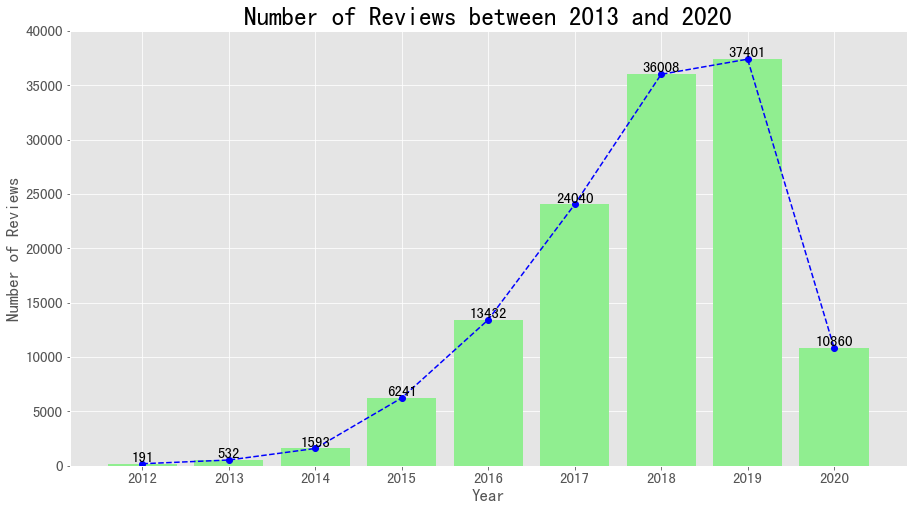

In [202]:
plt.figure(figsize=(15,8))

plt.plot(x,y,
         color="blue", marker="o",
         linestyle="--")

plt.bar(x,y, color="lightgreen")

plt.title("Number of Reviews between 2013 and 2020",fontsize=25)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Number of Reviews', fontsize=17)

plt.xticks(range(2012,2021))
plt.tick_params(labelsize=15)
plt.ylim(ymin = 0, ymax = 40000)

for a,b in zip(x,y):
    
    plt.text(a,b+10,b,   
             va='bottom', 
             ha='center',
             fontsize=15)
      
plt.show()

以前的代码：

In [28]:
def counter(df, date):
    yr = int(date[:4])
    mon = int(date[-2:])
 
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    target = df[(df['year']==yr) & (df['month']==mon)]
    return target.shape[0]

In [29]:
dates = ['2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
         '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-10', '2020-11', '2020-12']

In [30]:
reviews = []
path = '/content/drive/My Drive/data/data/'

In [31]:
for date in dates:
    review = pd.read_csv(path+date+'/reviews.csv')
    reviews.append(counter(review,date))
print(reviews)

[1399, 1521, 2263, 2480, 1996, 3206, 2682, 2385, 2514, 2861, 2797, 2124, 901, 493, 512, 330, 314, 337, 521]


<BarContainer object of 19 artists>

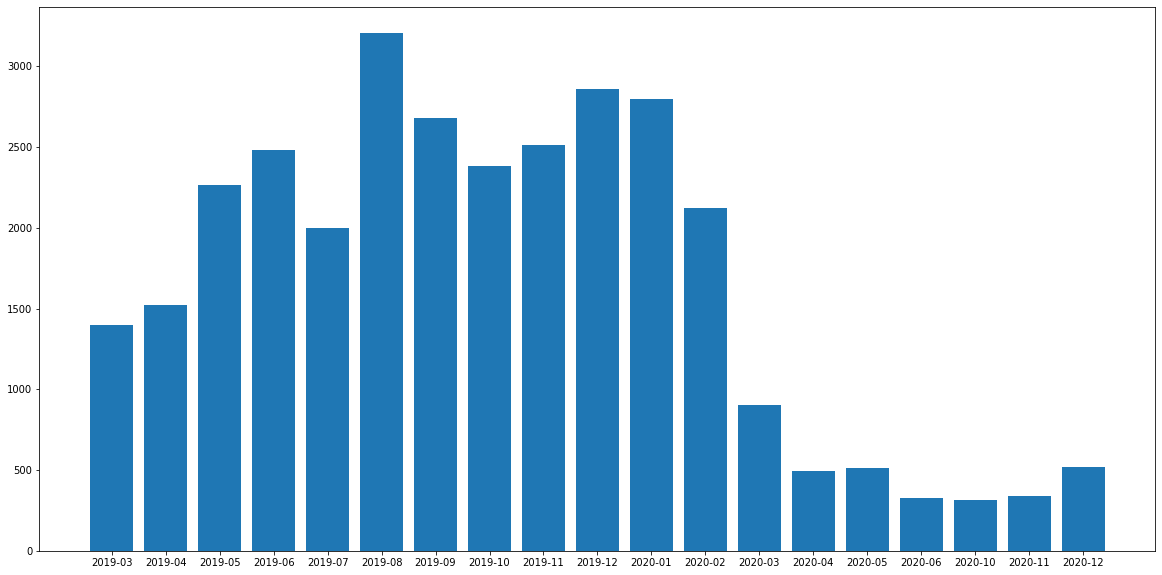

In [32]:
plt.figure(figsize=(20,10))
plt.bar(dates, reviews)